In [5]:
import pandas as pd
import networkx as nx
import community as community_louvain  # Louvain method from the python-louvain package
import json

In [6]:
# Step 1: Load the CSV file and preprocess
def load_data(csv_file):
    df = pd.read_csv(csv_file)
    return df

In [7]:
# Step 2: Build the Graph with call times as edge attributes
def build_graph(df):
    G = nx.Graph()
    # Add edges between clients with call time attributes (start and end)
    for _, row in df.iterrows():
        node1 = int(row['nodeNaam1'])  # Ensure int conversion
        node2 = int(row['nodeNaam2'])  # Ensure int conversion
        begintijd = int(row['begintijd'])  # Ensure int conversion
        eindtijd = int(row['eindtijd'])  # Ensure int conversion
        G.add_edge(node1, node2, begintijd=begintijd, eindtijd=eindtijd)  # Add edge with attributes
    return G

In [8]:
# Step 3: Detect Communities Using Louvain Method and Store Call Times
def detect_communities_with_louvain(G):
    # Louvain method to detect communities
    partition = community_louvain.best_partition(G)
    
    # Create a dictionary to store nodes and edges per community
    community_dict = {}
    community_id = 1  # Start community IDs from 1

    for node, community in partition.items():
        if community not in community_dict:
            community_dict[community] = {
                'community_id': community_id,
                'nodes': [],
                'edges': []
            }
            community_id += 1
        community_dict[community]['nodes'].append(node)
    
    # Add edges for each community
    for community in community_dict.values():
        for node1 in community['nodes']:
            for node2 in community['nodes']:
                if node1 < node2 and G.has_edge(node1, node2):
                    # Get call times for each edge between nodes
                    call_times = G[node1][node2]
                    edge_info = {
                        'node1': int(node1),  # Ensure int conversion
                        'node2': int(node2),  # Ensure int conversion
                        'begintijd': int(call_times['begintijd']),  # Ensure int conversion
                        'eindtijd': int(call_times['eindtijd'])  # Ensure int conversion
                    }
                    if edge_info not in community['edges']:
                        community['edges'].append(edge_info)
    
    return list(community_dict.values())

In [9]:
def store_communities_with_call_times(communities, output_file):
    with open(output_file, 'w') as f:
        json.dump(communities, f, indent=4)


In [10]:
# Full pipeline
def community_detection_with_louvain(csv_file, output_file):
    # Load data
    df = load_data(csv_file)
    
    # Build graph with call times
    G = build_graph(df)
    
    # Detect communities using Louvain method
    communities = detect_communities_with_louvain(G)
    
    # Store communities with call times
    store_communities_with_call_times(communities, output_file)

In [ ]:
data/avgRela50_data_50000_20.csv

In [7]:
csv_file_path = '../data/avgRela50_data_50000_20.csv'  # replace with the actual CSV file path
output_communities_file = '50K_20.json'
community_detection_with_louvain(csv_file_path, output_communities_file)

In [8]:
csv_file_path = '../data/full_data_1000.csv'  # replace with the actual CSV file path
output_communities_file = '10K.json'
community_detection_with_louvain(csv_file_path, output_communities_file)

In [9]:
csv_file_path = '../data/small_test2_data.csv'  # replace with the actual CSV file path
output_communities_file = 'Small_test.json'
community_detection_with_louvain(csv_file_path, output_communities_file)

In [8]:
csv_file_path = '../data/full_data_20000.csv'  # replace with the actual CSV file path
output_communities_file = '20K.json'
community_detection_with_louvain(csv_file_path, output_communities_file)

## evaluation metric
load datasets and run louvain algorithm on them

In [2]:
import time

### size evaluations

In [9]:
# nodes 3000, edges 20
csv_file_path = '../data/avgRela50_data_3000_20.csv' 
output_communities_file = '3Knode_20edge.json'
t0 = time.time()
community_detection_with_louvain(csv_file_path, output_communities_file)
t1 = time.time()
total = t1-t0
print(total)

11.073784351348877


In [10]:
# nodes 5000, edges 20
csv_file_path = '../data/avgRela50_data_5000_20.csv' 
output_communities_file = '5Knode_20edge.json'
t0 = time.time()
community_detection_with_louvain(csv_file_path, output_communities_file)
t1 = time.time()
total = t1-t0
print(total)

25.070809841156006


In [11]:
# nodes 10000, edges 20
csv_file_path = '../data/avgRela50_data_10000_20.csv' 
output_communities_file = '10Knode_20edge.json'
t0 = time.time()
community_detection_with_louvain(csv_file_path, output_communities_file)
t1 = time.time()
total = t1-t0
print(total)

59.52233147621155


In [11]:
# nodes 15000, edges 20
csv_file_path = '../data/avgRela50_data_15000_20.csv' 
output_communities_file = '15Knode_20edge.json'
t0 = time.time()
community_detection_with_louvain(csv_file_path, output_communities_file)
t1 = time.time()
total = t1-t0
print(total)

85.41030240058899


In [13]:
# nodes 20000, edges 20
csv_file_path = '../data/avgRela50_data_20000_20.csv' 
output_communities_file = '20Knode_20edge.json'
t0 = time.time()
community_detection_with_louvain(csv_file_path, output_communities_file)
t1 = time.time()
total = t1-t0
print(total)

155.35351729393005


In [13]:
# nodes 50000, edges 20
csv_file_path = '../data/avgRela50_data_50000_20.csv' 
output_communities_file = '50Knode_20edge.json'
t0 = time.time()
community_detection_with_louvain(csv_file_path, output_communities_file)
t1 = time.time()
total = t1-t0
print(total)

341.9356949329376


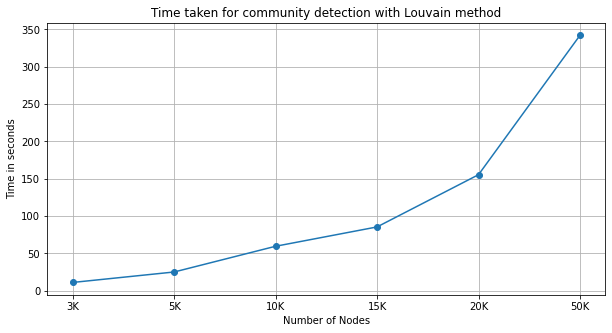

In [ ]:
# graph to represent the speed of the algorithm for the various sizes of the data
time3k = 11.073784351348877
time5k = 25.070809841156006
time10k = 59.52233147621155
time15k = 85.41030240058899
time20k = 155.35351729393005
time50k = 341.9356949329376

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
x = ['3K', '5K', '10K', '15K', '20K', '50K']
y = [time3k, time5k, time10k, time15k, time20k, time50k]
plt.plot(x, y, marker='o')
plt.xlabel('Number of Nodes')
plt.ylabel('Time in seconds')
plt.title('Time taken for community detection with Louvain method')
plt.grid()
plt.show()

### complexity evaluation

In [17]:
# nodes 20000, edges 3
csv_file_path = '../data/avgRela50_data_20000_3.csv' 
output_communities_file = '10Knode_3edge.json'
t0 = time.time()
community_detection_with_louvain(csv_file_path, output_communities_file)
t1 = time.time()
total = t1-t0
print(total)

22.391884326934814


In [ ]:
# nodes 20000, edges 5
csv_file_path = '../data/avgRela50_data_20000_5.csv' 
output_communities_file = '10Knode_5edge.json'
t0 = time.time()
community_detection_with_louvain(csv_file_path, output_communities_file)
t1 = time.time()
total = t1-t0
print(total)

44.96259093284607


In [ ]:
# nodes 20000, edges 10
csv_file_path = '../data/avgRela50_data_20000_10.csv' 
output_communities_file = '10Knode_10edge.json'
t0 = time.time()
community_detection_with_louvain(csv_file_path, output_communities_file)
t1 = time.time()
total = t1-t0
print(total)

49.382936000823975


In [ ]:
# nodes 20000, edges 15
csv_file_path = '../data/avgRela50_data_20000_15.csv' 
output_communities_file = '10Knode_15edge.json'
t0 = time.time()
community_detection_with_louvain(csv_file_path, output_communities_file)
t1 = time.time()
total = t1-t0
print(total)

53.61463212966919


In [ ]:
# nodes 20000, edges 20
csv_file_path = '../data/avgRela50_data_20000_20.csv' 
output_communities_file = '10Knode_20edge.json'
t0 = time.time()
community_detection_with_louvain(csv_file_path, output_communities_file)
t1 = time.time()
total = t1-t0
print(total)

64.18218731880188


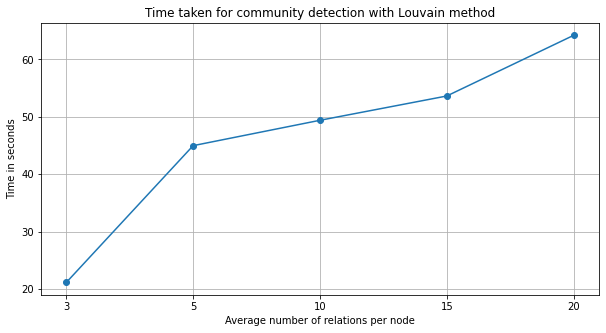

In [ ]:
# graph to represent the speed of the algorithm for the various avg. number of edges
time3 = 21.12712025642395
time5 = 44.96259093284607
time10 = 49.382936000823975
time15 = 53.61463212966919
time20 = 64.18218731880188

plt.figure(figsize=(10, 5))
x = ['3', '5', '10', '15', '20']
y = [time3, time5, time10, time15, time20]
plt.plot(x, y, marker='o')
plt.xlabel('Average number of relations per node')
plt.ylabel('Time in seconds')
plt.title('Time taken for community detection with Louvain method')
plt.grid()
plt.show()